In [24]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,f1_score,recall_score, ConfusionMatrixDisplay

In [25]:
# LOADING DATASET
df=pd.read_csv('/content/Zoo.csv')

In [26]:
# @title PERFORMING EDA
df.head(8)  # checking dataset and its features.

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4


In [27]:
df  #checking dataset.

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [28]:
# checking no of rows and columns
df.shape
# dataset has 101 rows and 18 columns

(101, 18)

In [29]:
# Checking data types
df.info()  # Only animal column is object, rest of all are integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [30]:
# checking null values.
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [31]:
# checking for duplicates
df.duplicated().sum()
#  0 duplicated records.

0

In [32]:
# performing basic statistics.
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
# checking for animal name
df.describe(include='object')

,animal name
count,101
unique,100
top,frog
freq,2


In [34]:
# checking unique values of each columns and their counts using user define function.
def unique_in_columns(df, column): # Adding df as an argument
  unique = df[column].value_counts() # Select single column.
  return unique

# Iterating over each column to get unique value counts.
colnames=df.columns
for col in colnames:
    unique = unique_in_columns(df, col) # Passing df and column name here
    print(f"Unique values in {col}:\n{unique}\n")

Unique values in animal name:
animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

Unique values in hair:
hair
0    58
1    43
Name: count, dtype: int64

Unique values in feathers:
feathers
0    81
1    20
Name: count, dtype: int64

Unique values in eggs:
eggs
1    59
0    42
Name: count, dtype: int64

Unique values in milk:
milk
0    60
1    41
Name: count, dtype: int64

Unique values in airborne:
airborne
0    77
1    24
Name: count, dtype: int64

Unique values in aquatic:
aquatic
0    65
1    36
Name: count, dtype: int64

Unique values in predator:
predator
1    56
0    45
Name: count, dtype: int64

Unique values in toothed:
toothed
1    61
0    40
Name: count, dtype: int64

Unique values in backbone:
backbone
1    83
0    18
Name: count, dtype: int64

Unique values in breathes:
breathes
1    80
0    21
Name: count, dtype: int64

Un

In [35]:
# important unique values are of legs and  types
# unique values in legs are - 0,2,4,5,6,8

Text(0.5, 1.0, 'count plot of types')

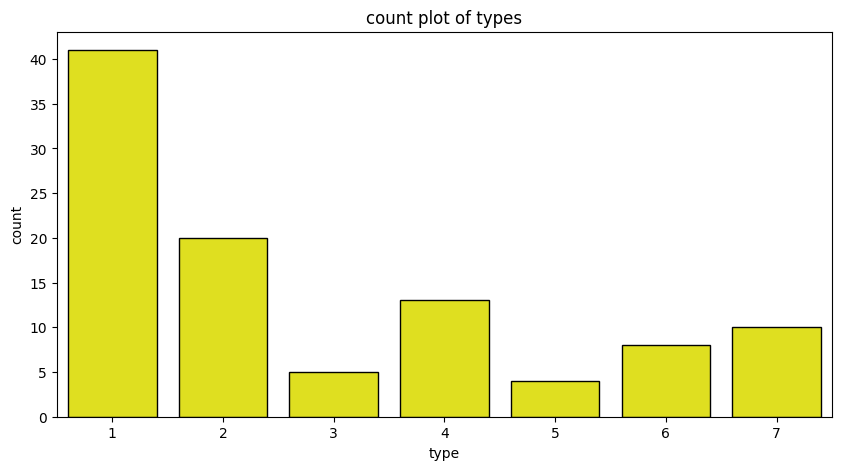

In [36]:
# @title DATA VISUALIZATION
# plotting countplot for types
plt.figure(figsize=(10,5))
sns.countplot(x=df['type'], color='YELLOW',edgecolor='black')
plt.title('count plot of types')

Text(0.5, 1.0, 'count plot of legs')

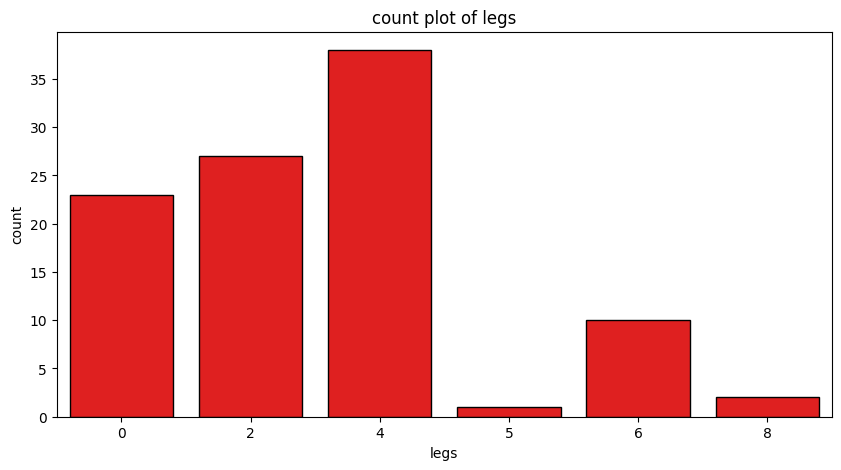

In [37]:
# plotting countplot for legs
plt.figure(figsize=(10,5))
sns.countplot(x=df['legs'], color='RED',edgecolor='BLACK')
plt.title('count plot of legs')

In [38]:
# dropping name column as it's unnecessary
df.drop('animal name',inplace=True,axis=1)

In [39]:
df.head() # checking changed data.

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [40]:
# @title Splitting Data
x= df.drop('type',axis=1)
y=df['type']

In [42]:
x.head()
# only legs has value more than 0 and 1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [43]:
# scaling x using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [44]:
x_scaled.head(8)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [45]:
# using train test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [46]:
model=KNeighborsClassifier()

In [47]:
# Grid search method
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': np.arange(1,31)}  # assigning parameters
grid=GridSearchCV(model,param_grid,cv=10)  # creating grid search
grid.fit(x_train,y_train) # fitting the data

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [48]:
print(grid.best_params_)  #printing best parameters

{'n_neighbors': 1}


In [49]:
print(grid.best_score_)  # printing best score
# n_neighbor=1 can give overfitted model so can go for bigger value
# n_estimators=5 gives score of 0.95 which shows 1 value is giving overfitted model.

0.9625


In [50]:
grid_pred=grid.predict(x_test)

Text(0.5, 1.0, ' Score as per k value')

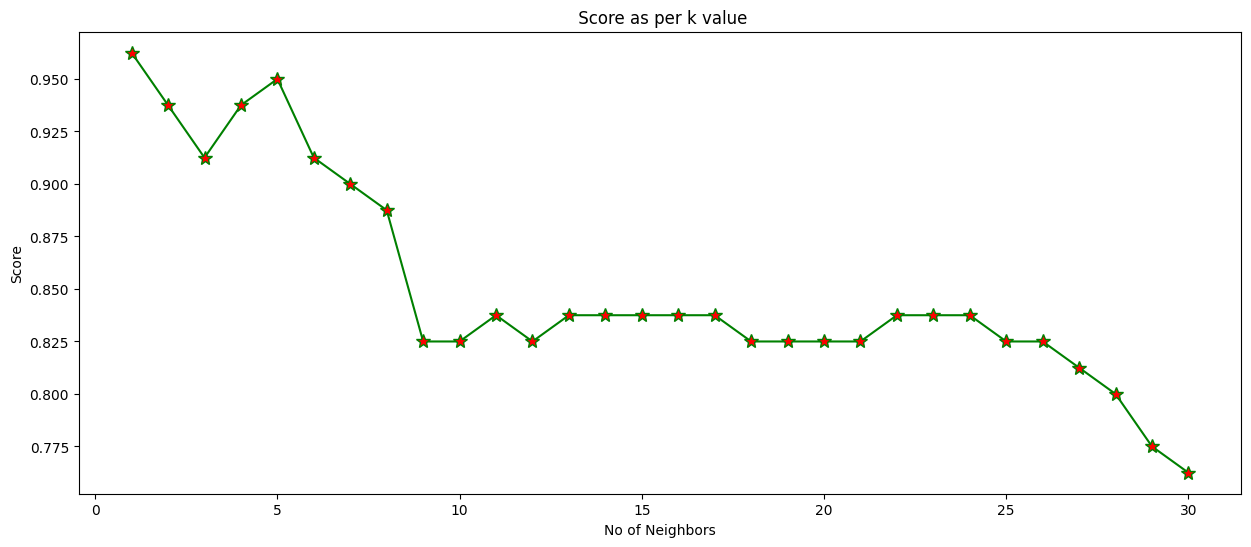

In [51]:
# forming score as per no of neighbors.
plt.figure(figsize=(15,6))
plt.plot(grid.cv_results_['param_n_neighbors'],grid.cv_results_['mean_test_score'],color='green',marker='*',markerfacecolor='red',markersize=10)
plt.xlabel('No of Neighbors')
plt.ylabel('Score')
plt.title(' Score as per k value')
# it can be concluded that k=5 will give an optimum result

In [52]:
# model building using k value as 5
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [53]:
model.fit(x_train,y_train)  # training model

KNeighborsClassifier(metric='euclidean')

In [54]:
y_pred=model.predict(x_test)

In [55]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [56]:
# @title Model Evaluation

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)

accuracy: 0.9523809523809523
precision: 0.9206349206349207
recall: 0.9523809523809523
f1: 0.9333333333333333


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



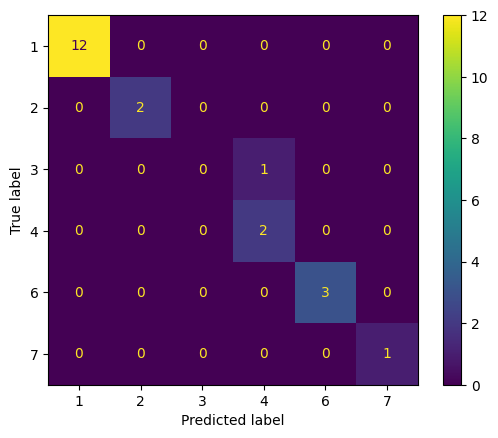

In [58]:
# displaying confusion matrix
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

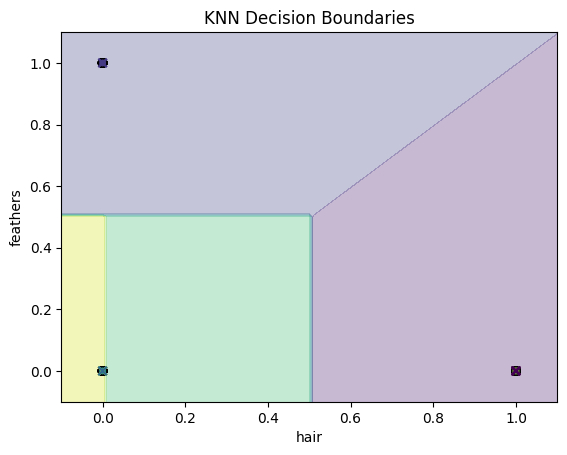

In [59]:
# @title DECISION BOUNDARY VISUALIZATION

feature_1 = 'hair' #taking feature 1
feature_2 = 'feathers' #taking feature 2
k=5

X_train_2d = x_train[[feature_1, feature_2]]
X_test_2d = x_test[[feature_1, feature_2]]


knn_2d = KNeighborsClassifier(n_neighbors=k, metric='euclidean') #training
knn_2d.fit(X_train_2d, y_train) #fitting data

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_train_2d.iloc[:, 0].min() - 0.1, X_train_2d.iloc[:, 0].max() + 0.1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 0.1, X_train_2d.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#plotting
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolors='k', marker='o')
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c=y_test, edgecolors='k', marker='x')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('KNN Decision Boundaries')
plt.show()

**Interview Questions**

1-> Key hyperparameters in knn are-

1. n_estimators- no of neighbors i.e k value

2. Distance metric- like euclidean method, manhattan method

3. Weighted function


2-> In k-Nearest Neighbors (KNN), several distance metrics can be used to measure the distance between data points.The choice of distance metric can significantly affect the performance of the algorithm.

Euclidean method-Euclidean distance measures the straight-line distance between two points in a multi-dimensional space.

Manhattan distance-Measures the distance between points by summing the absolute differences of their coordinates.

Minkowski Distance-A generalization of Euclidean and Manhattan distances. The parameter p allows you to adjust the metric:

     



In [ ]:
# THANK YOU !!!